# EDA Aanalysis of Chocolate Imports into South Africa
## For the period 2010 - 2017

This data set was downloaded from the following website: https://data.openup.org.za/dataset?q=chocolate


# Contents
- Importing of libraries
- Reading the data set
- Cleaning the data
- Visualizing the data

## Importing our libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
# for Box-Cox Transformation
from scipy import stats
from pylab import *

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt
from wordcloud import WordCloud

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

### Importing our data

In [2]:
chocolate = pd.read_csv("chocs.csv")
chocolate.tail()

,tradetype,districtofficecode,districtofficename,countryoforigin,countryoforiginname,countryofdestination,countryofdestinationname,tariff,statisticalunit,transportcode,transportcodedescription,yearmonth,calendaryear,tariffanddescription,statisticalquantity,customsvalue,worldregion
995,Imports,OSH,Oshoek,SZ,Swaziland,ZA,South Africa,18062010,KG,3,Road,201410,2014,18062010 - Chocolate and sugar confectionery c...,0.75,54,AFRICA
996,Imports,KFN,Kopfontein,BW,Botswana,ZA,South Africa,18062010,KG,3,Road,201410,2014,18062010 - Chocolate and sugar confectionery c...,2560.00,109381,AFRICA
997,Imports,CTN,Cape Town,BE,Belgium,ZA,South Africa,18062010,KG,1,Maritime,201411,2014,18062010 - Chocolate and sugar confectionery c...,51840.00,2328328,EUROPE
998,Imports,CTN,Cape Town,BR,Brazil,ZA,South Africa,18062010,KG,1,Maritime,201411,2014,18062010 - Chocolate and sugar confectionery c...,3504.00,77426,AMERICA
999,Imports,DBN,Durban,BE,Belgium,ZA,South Africa,18062010,KG,1,Maritime,201411,2014,18062010 - Chocolate and sugar confectionery c...,164320.00,8093170,EUROPE


### Data Cleaning

Cleaning of data;
Getting the overall picture of our data set, i.e. (null values, redundant columns)


Null Values

In [3]:
chocolate.isnull().sum()

tradetype                    0
districtofficecode           0
districtofficename           0
countryoforigin             11
countryoforiginname          0
countryofdestination         0
countryofdestinationname     0
tariff                       0
statisticalunit              0
transportcode                0
transportcodedescription     0
yearmonth                    0
calendaryear                 0
tariffanddescription         0
statisticalquantity          0
customsvalue                 0
worldregion                  0
dtype: int64

Overall not looking too bad with null values only 11 values in column 'country of origin'

 Duplicated values


In [4]:
chocolate.duplicated().sum()


0

No duplicated values in dataset

Missing Values

In [5]:
missing_count = chocolate.isna().sum()
missing_count

tradetype                    0
districtofficecode           0
districtofficename           0
countryoforigin             11
countryoforiginname          0
countryofdestination         0
countryofdestinationname     0
tariff                       0
statisticalunit              0
transportcode                0
transportcodedescription     0
yearmonth                    0
calendaryear                 0
tariffanddescription         0
statisticalquantity          0
customsvalue                 0
worldregion                  0
dtype: int64

<AxesSubplot: >

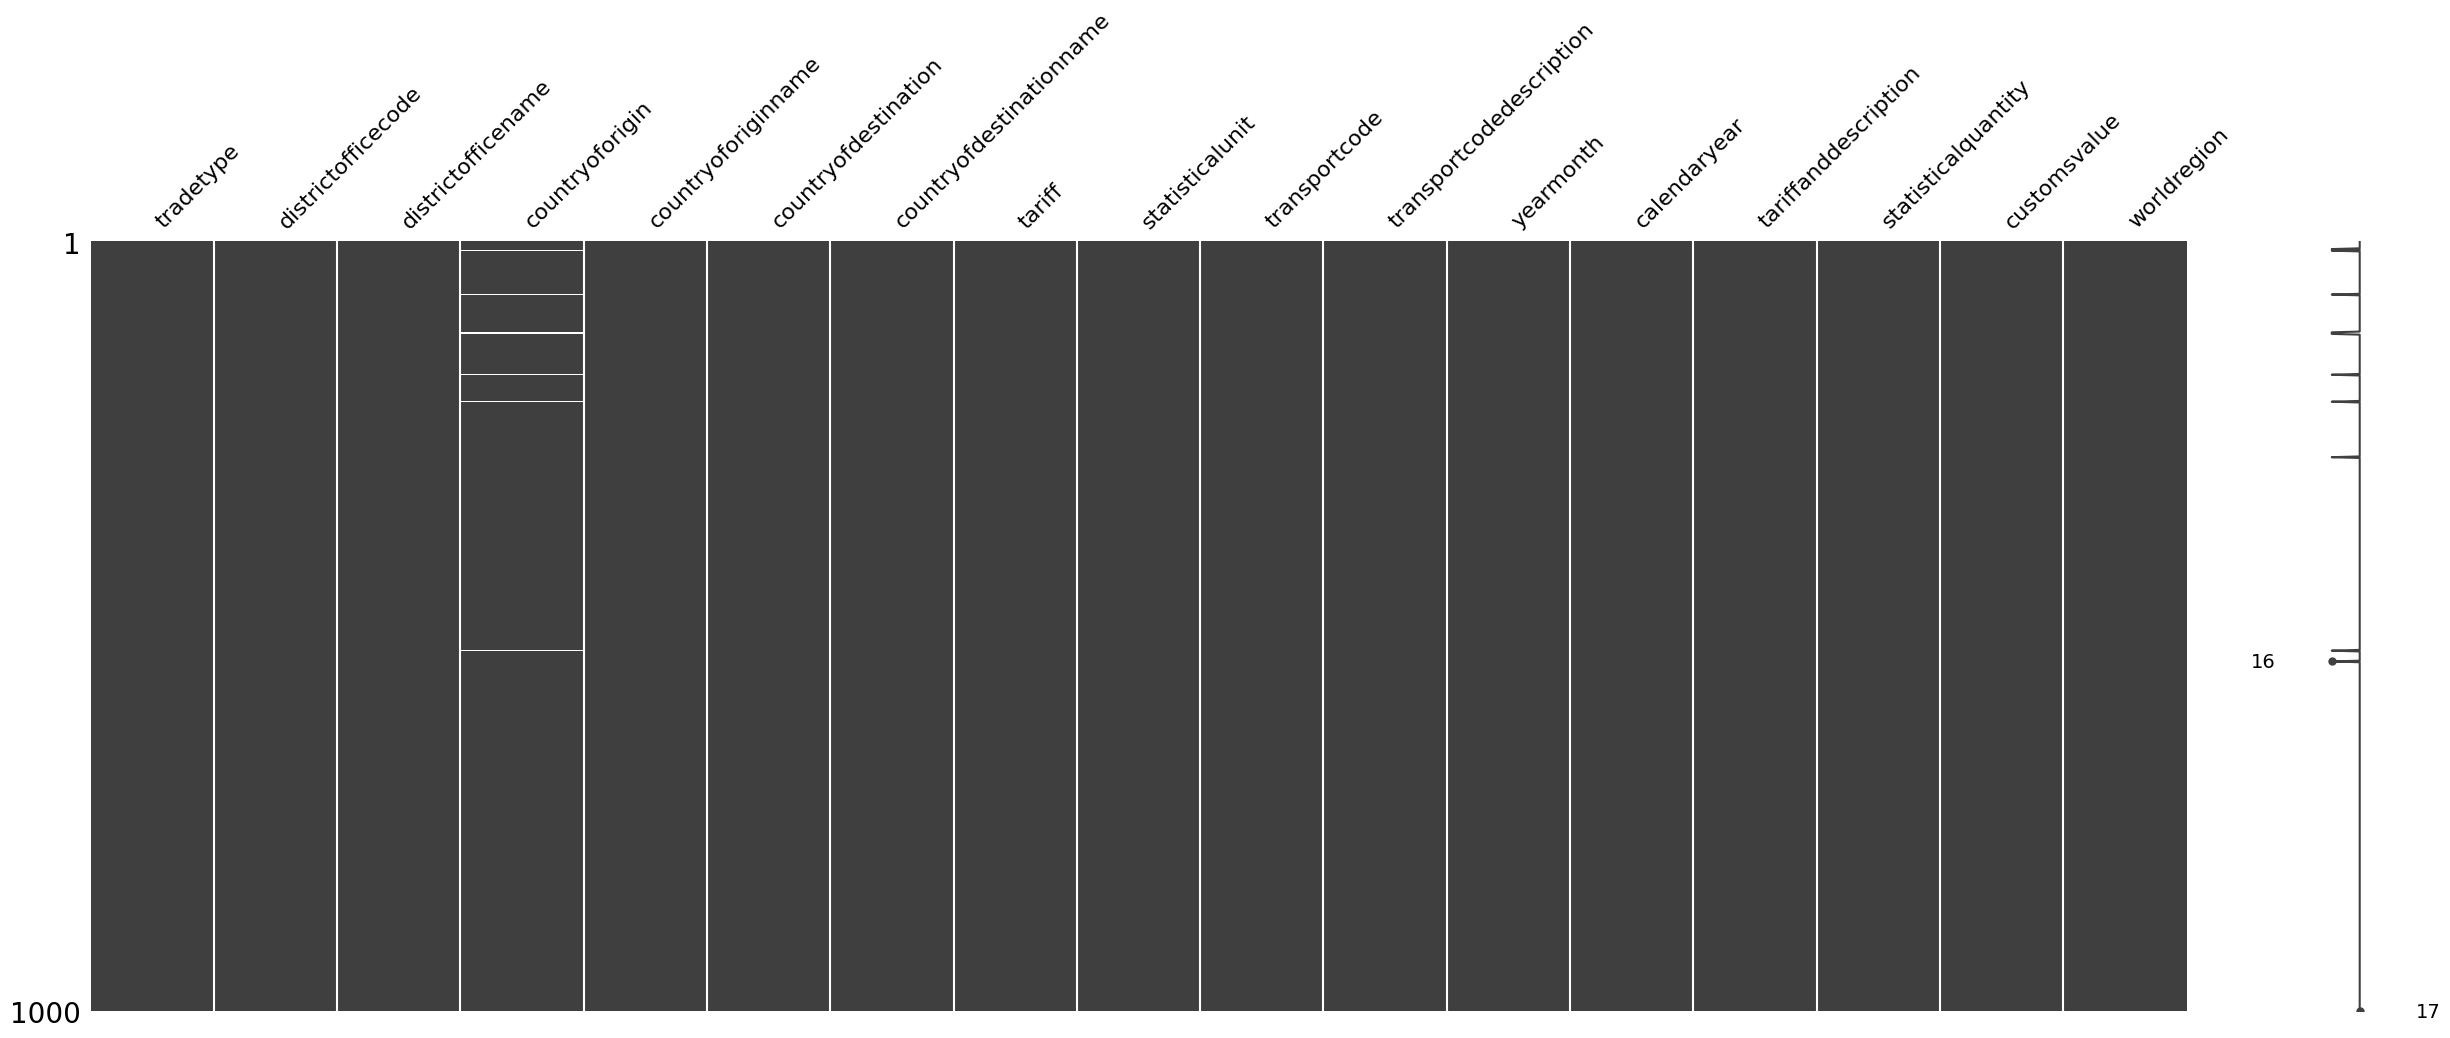

In [6]:
# Graphic visualisation of missing values
missingno.matrix(chocolate, figsize = (30,10))

In [7]:
chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tradetype                 1000 non-null   object 
 1   districtofficecode        1000 non-null   object 
 2   districtofficename        1000 non-null   object 
 3   countryoforigin           989 non-null    object 
 4   countryoforiginname       1000 non-null   object 
 5   countryofdestination      1000 non-null   object 
 6   countryofdestinationname  1000 non-null   object 
 7   tariff                    1000 non-null   int64  
 8   statisticalunit           1000 non-null   object 
 9   transportcode             1000 non-null   int64  
 10  transportcodedescription  1000 non-null   object 
 11  yearmonth                 1000 non-null   int64  
 12  calendaryear              1000 non-null   int64  
 13  tariffanddescription      1000 non-null   object 
 14  statistic

In [8]:
chocolate.columns

Index(['tradetype', 'districtofficecode', 'districtofficename',
       'countryoforigin', 'countryoforiginname', 'countryofdestination',
       'countryofdestinationname', 'tariff', 'statisticalunit',
       'transportcode', 'transportcodedescription', 'yearmonth',
       'calendaryear', 'tariffanddescription', 'statisticalquantity',
       'customsvalue', 'worldregion'],
      dtype='object')

In [9]:
chocolate.drop(["tradetype", " districtofficecode", "countryoforigin", "countryofdestination","tariff","statisticalunit"], axis = 1, inplace= True, errors='ignore')
chocolate.head()


,districtofficecode,districtofficename,countryoforiginname,countryofdestinationname,transportcode,transportcodedescription,yearmonth,calendaryear,tariffanddescription,statisticalquantity,customsvalue,worldregion
0,DBN,Durban,Ireland,South Africa,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,7026.70,94453,EUROPE
1,DBN,Durban,Belgium,South Africa,0,Transport mode not specified (Unknown - Other),201003,2010,18062010 - Chocolate and sugar confectionery c...,55462.00,2042006,EUROPE
2,DBN,Durban,Belgium,South Africa,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,23160.00,724672,EUROPE
3,CTN,Cape Town,Switzerland,South Africa,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,19445.00,1253110,EUROPE
4,CTN,Cape Town,Brazil,South Africa,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,4180.93,31603,AMERICA


### Visualizing of our Data

Text(0, 0.5, 'Frequency ')

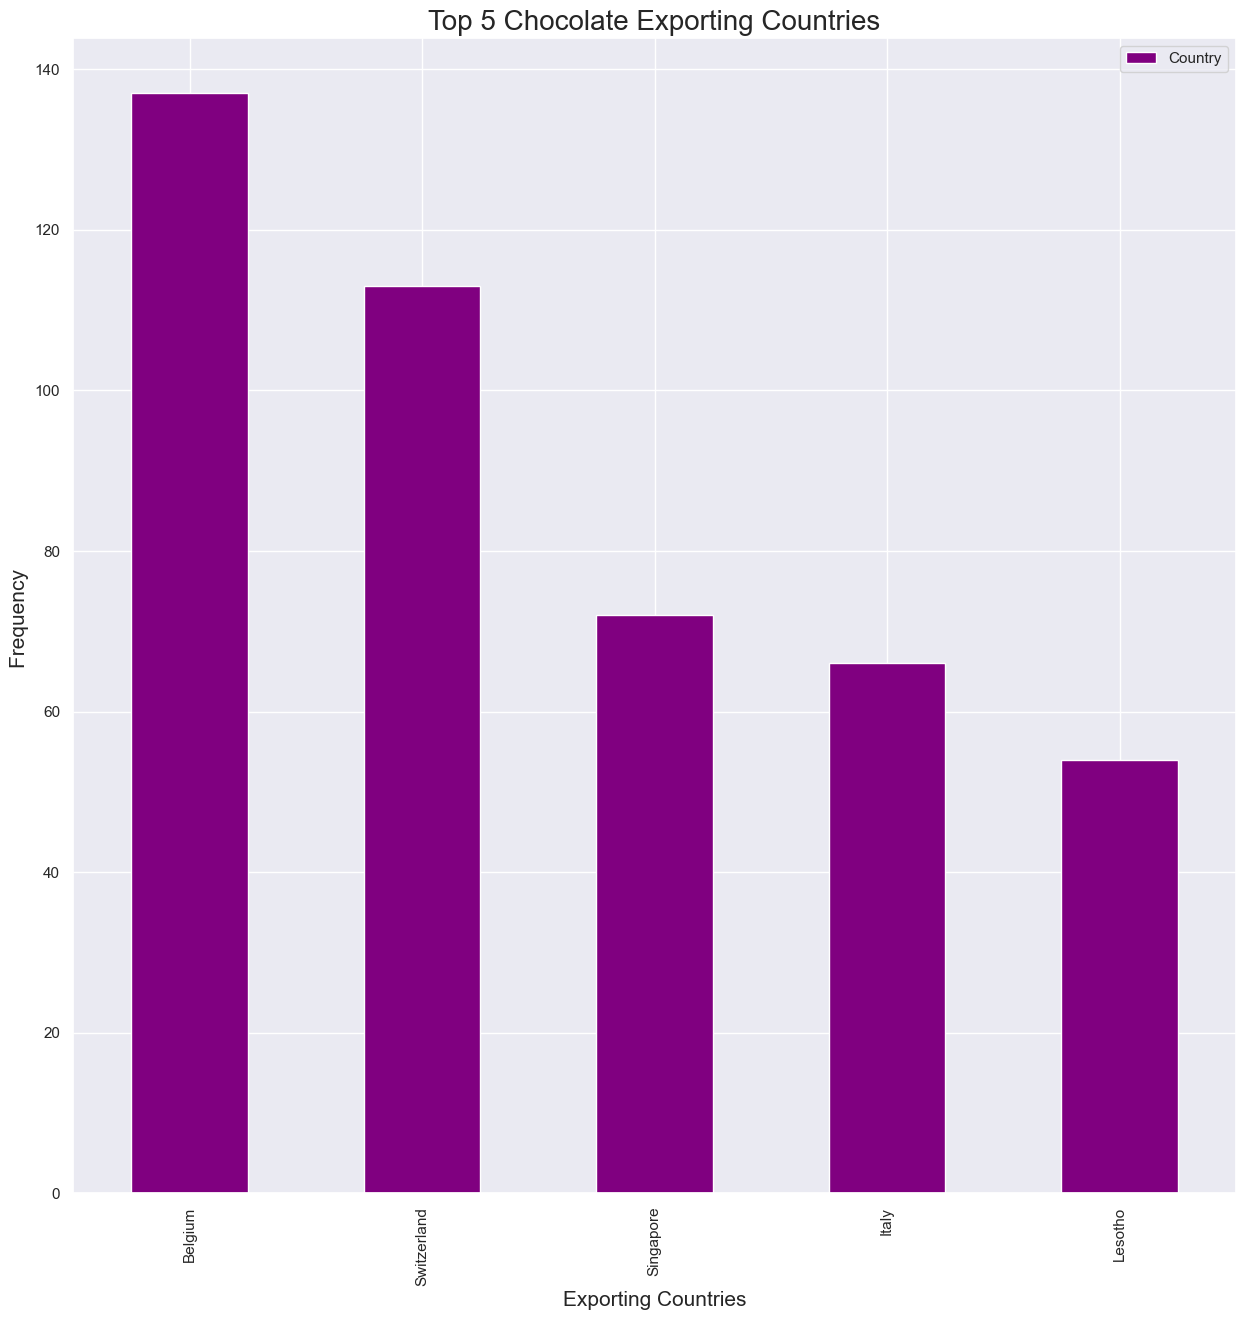

In [26]:
# ranking top 3 importing countries according to customs revenue
chocolate.countryoforiginname.value_counts().nlargest(5).plot(kind='bar',legend='Top 10 Chocolate Importing countries', color='purple', figsize=(15,15))

plt.legend(['Country'], loc='upper right')
plt.title("Top 5 Chocolate Exporting Countries", fontsize=20)
plt.xlabel('Exporting Countries', fontsize=15)
plt.ylabel('Frequency ',fontsize=15)


The top 5 biggest exporters of Chocolate to South Africa per volume.

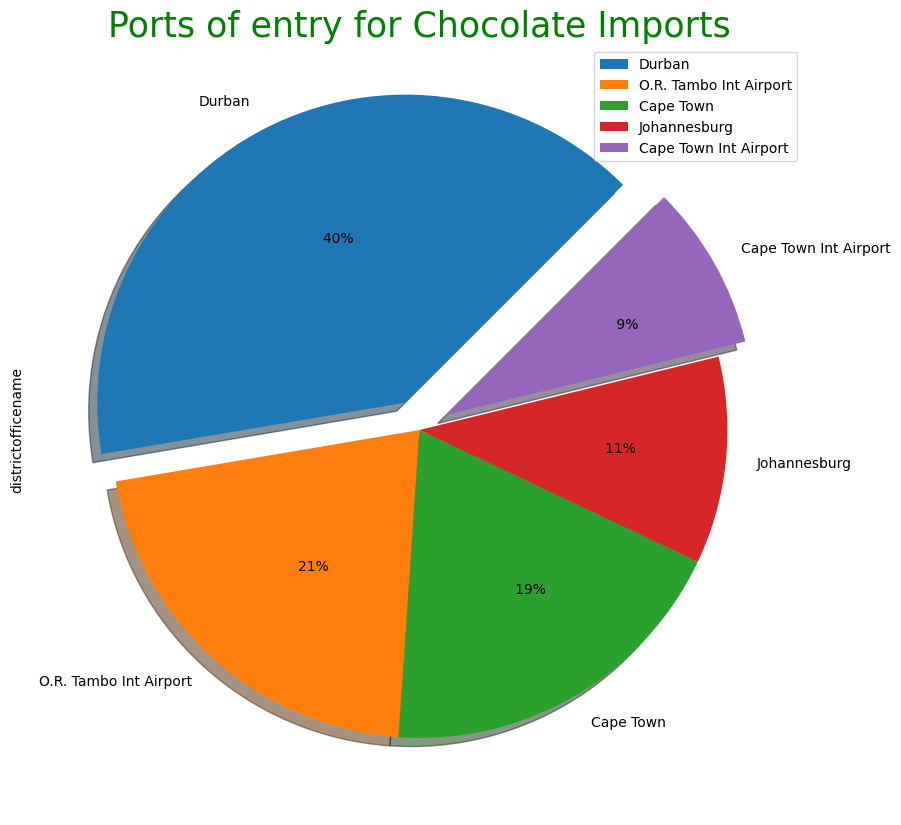

In [11]:
# Ports of entry for imports of chocolate

chocolate.districtofficename.value_counts().nlargest(5).plot(kind='pie',legend='Ports of Entry',explode=[0.1,0,0,0,0.1], shadow=True, startangle=45,autopct='%10.f%%', figsize=(10,10))

plt.title("Ports of entry for Chocolate Imports", fontsize=25, color='green')
plt.show()


Here we can see the ports of entry handling the biggest volumes of chocolate imports.

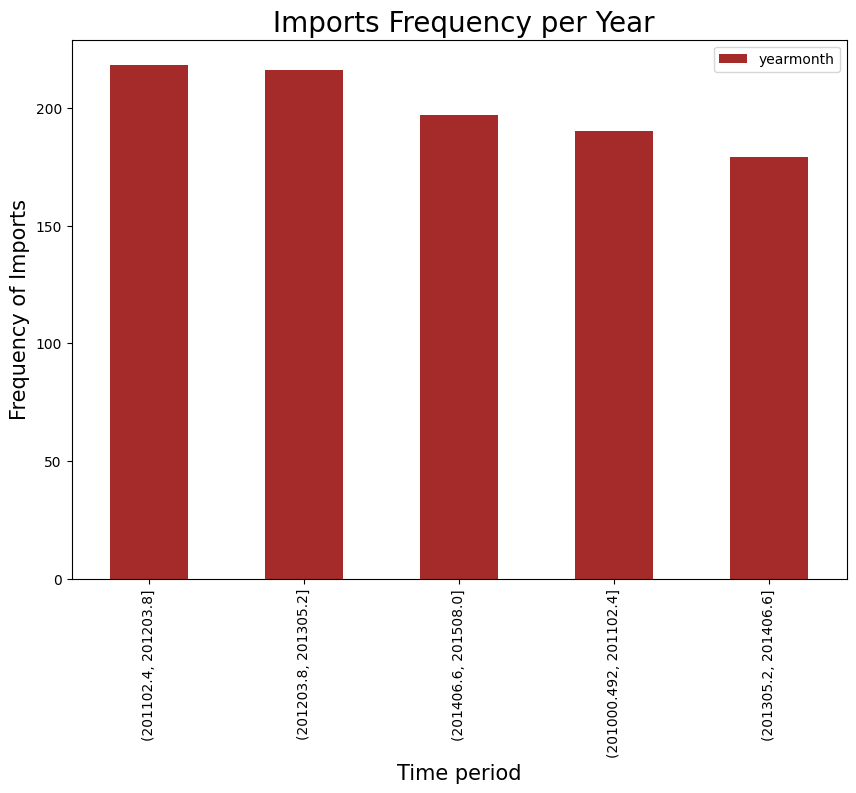

In [12]:
# Imports per Month

chocolate.yearmonth.value_counts(sort=False,bins= 5, ascending=False).nlargest(10).plot(kind='bar',color= 'brown', figsize=(10,7))

plt.title(" Imports Frequency per Year", fontsize=20, color='black')
plt.ylabel('Frequency of Imports', fontsize= 15)
plt.xlabel('Time period', fontsize=15)
plt.legend()
plt.show()

Chocolate imports per month over the period 2011-2013

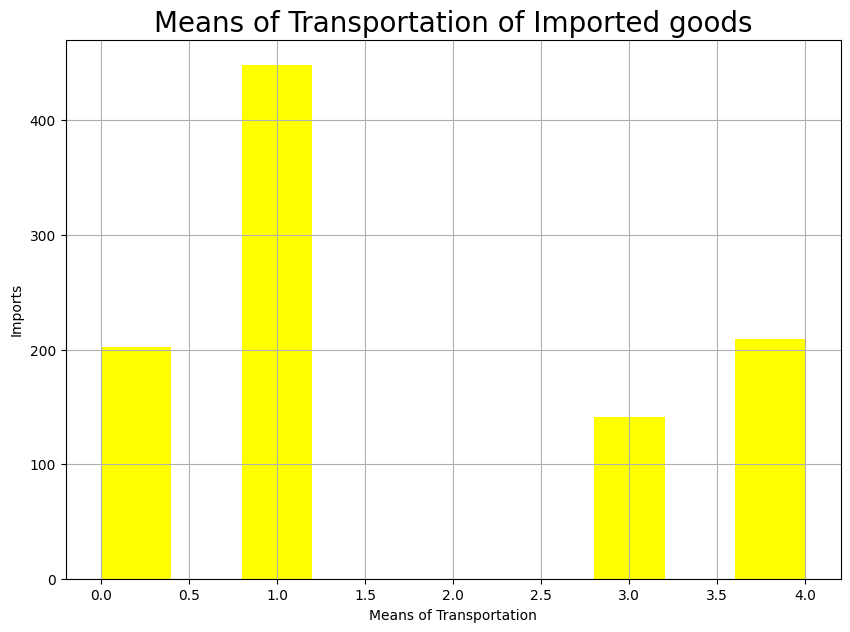

In [13]:
# Port of Entry histogram
chocolate.transportcode[np.abs(chocolate.transportcode-chocolate.transportcode.mean())<=(3*chocolate.transportcode.std())].hist(bins=10,color='yellow',figsize=(10,7));
plt.title("Means of Transportation of Imported goods", fontsize=20)

plt.ylabel('Imports')
plt.xlabel('Means of Transportation');



The most frequent mode of transportation used to transport the product once it is past the port of entry into South Africa.

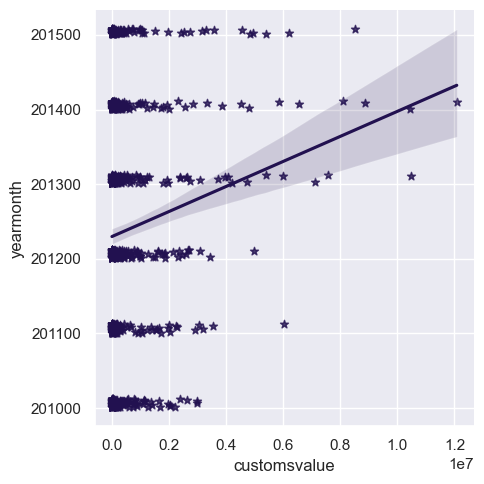

In [14]:
# Regression
sns.set_theme(palette='magma',style='darkgrid',color_codes=True)
sns.lmplot(x="customsvalue", y="yearmonth", markers='*', data=chocolate);

Here we can see the correlation between the year imported and the value imported.

Text(0.5, 1.0, 'Statistical Analysis')

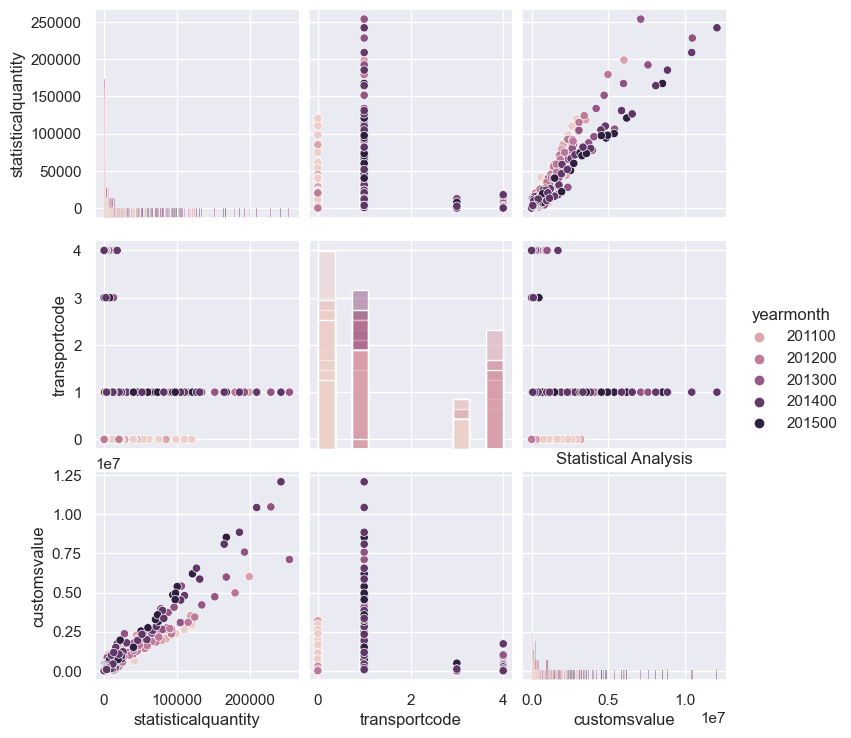

In [15]:
# Statistical visualisations
imports = sns.pairplot(chocolate[["statisticalquantity", "transportcode", "yearmonth", "customsvalue"]], hue="yearmonth", diag_kind="hist")

plt.title('Statistical Analysis')

Overall correlation of our data set.

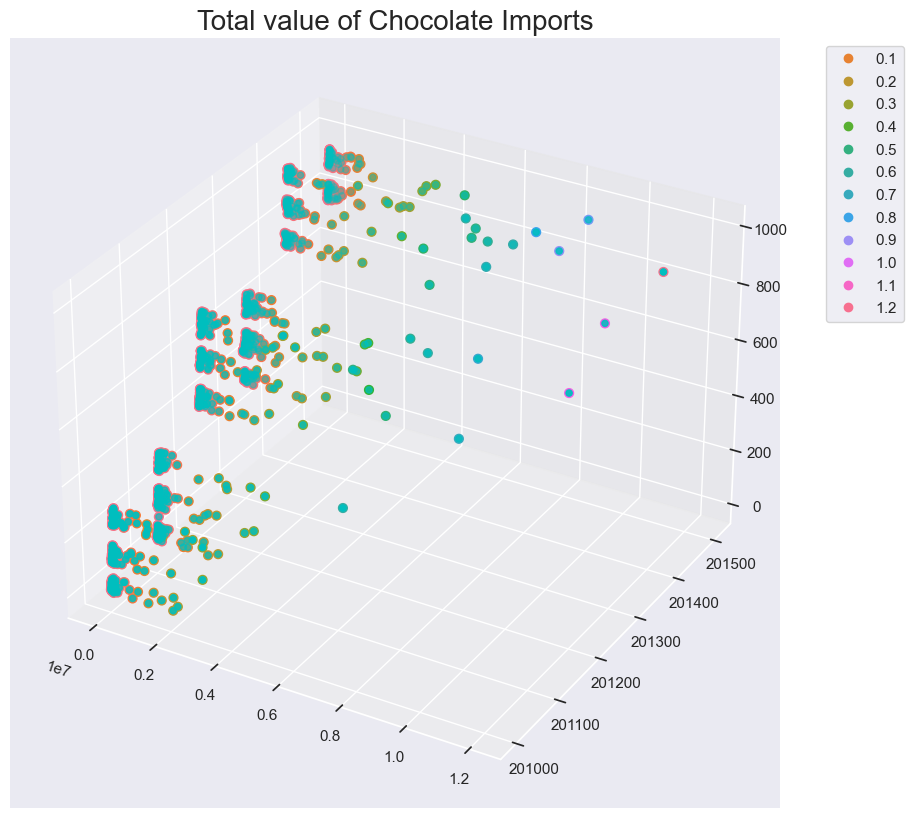

In [16]:
# 3D scatter plot
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

x = chocolate['customsvalue']
y = chocolate['yearmonth']
z = chocolate.index

plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.scatter3D(x, y, z, color = "c")
plt.title("Total value of Chocolate Imports", fontsize=20)

plt.show()




Total value of chocolate imports

Text(0.5, 1.0, 'Imports classified by World region')

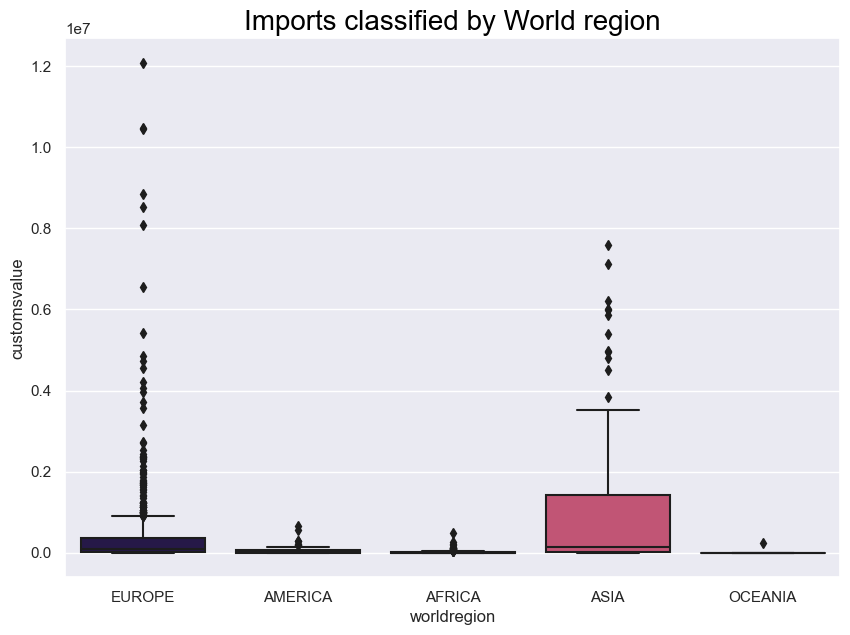

In [17]:
# Value of imports by Region
plt.rcParams['figure.figsize']=(10,7)
ax = sns.boxplot(x="worldregion", y="customsvalue", data=chocolate)
plt.title('Imports classified by World region', fontsize=20, color='black')
    

Volume of imports per World Region.

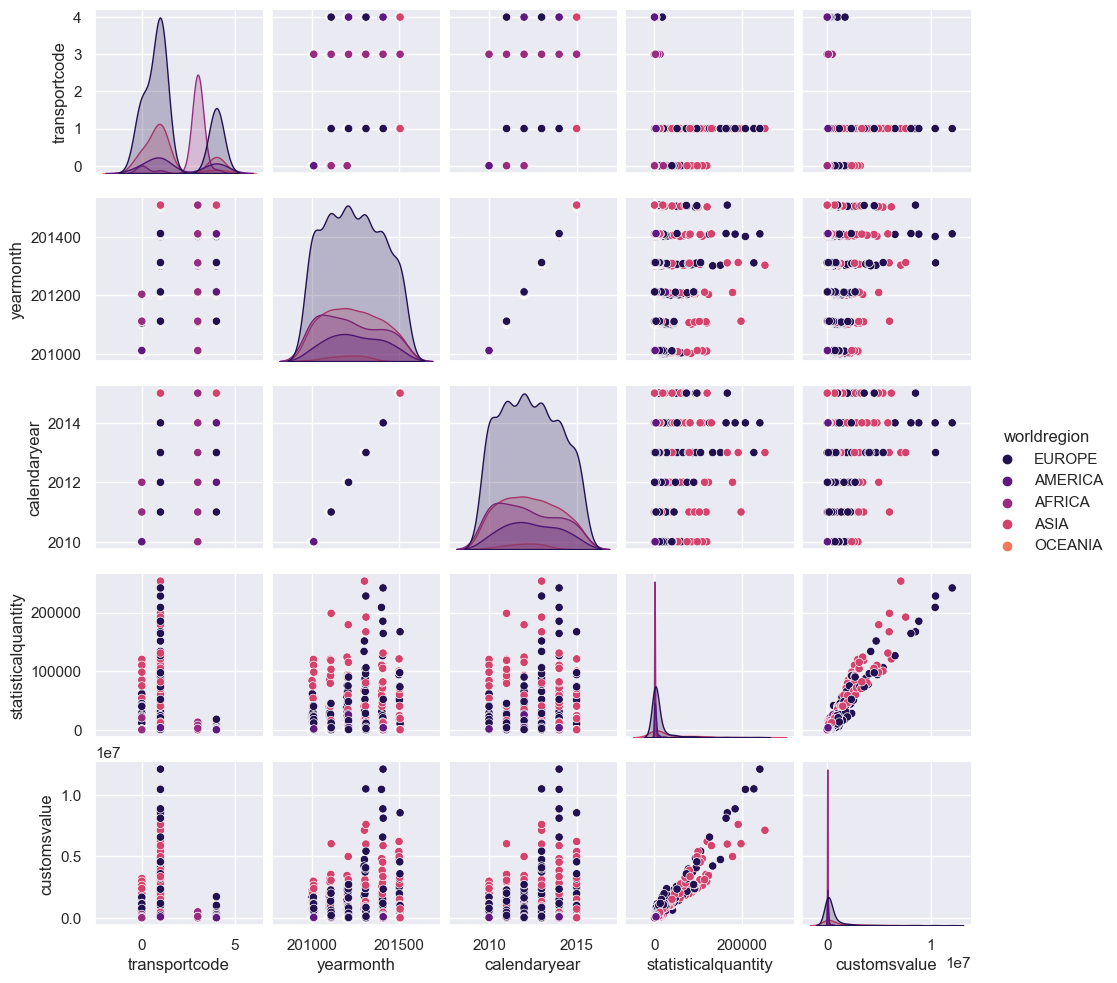

In [18]:
# Correlation Analysis
import seaborn as sns

sns.pairplot(chocolate, hue='worldregion', height=2);

Correlation analysis of chocolate imports.

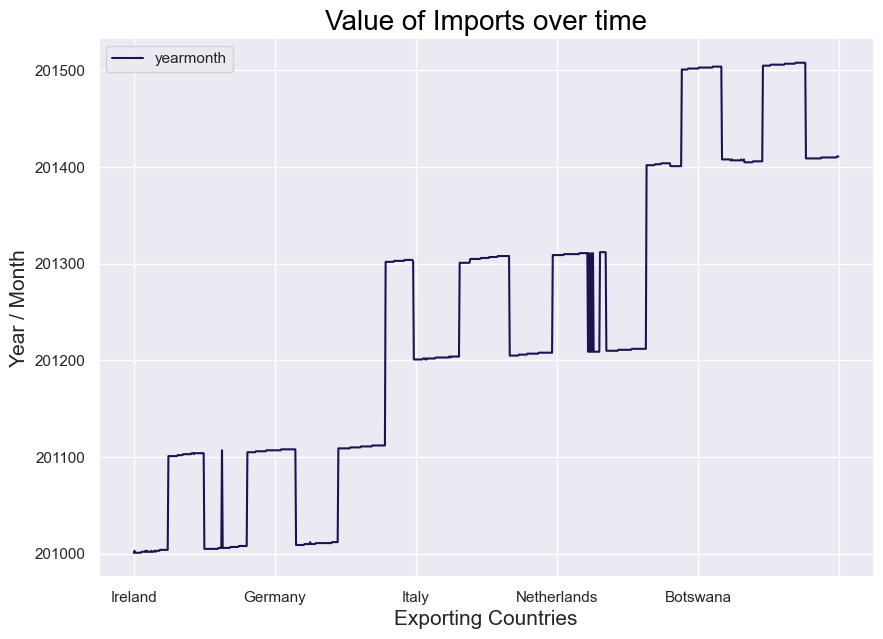

In [19]:
# Stacked area plot    
chocolate.plot(x= 'countryoforiginname', y=['yearmonth'])
plt.title('Value of Imports over time', fontsize=20, color='black')
plt.xlabel('Exporting Countries', fontsize=15)
plt.ylabel('Year / Month', fontsize=15)

plt.show()



Here we can see that the value of imports over time has increased steadily.

In [20]:
# Worldmap
import plotly.graph_objects as go

fig = go.Figure(go.Scattergeo())
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [21]:
import plotly.express as px

import plotly.graph_objects as go
import pandas as pd


fig = go.Figure(
    data=go.Surface(z=chocolate.values),
    layout=go.Layout(
        title="Chocolate Imports",
        width=500,
        height=500,
    ))

for template in ["plotly_white"]:
    fig.update_layout(template=template, title="Chocolate Imports")
    fig.show()

3D overall view of the value of chocolate imports. 

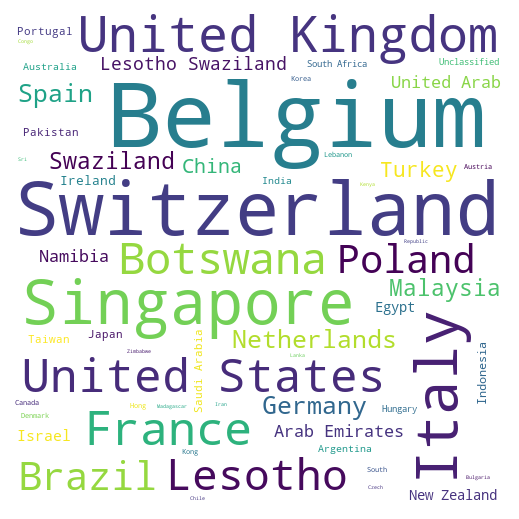

In [22]:
# Importing Countries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = " ".join(review for review in chocolate.countryoforiginname.astype(str))

wordcloud = WordCloud(background_color="white", width=500, height=500, margin=10).generate(text)
WordCloud().generate(text)

plt.figure(figsize=(5,10))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')


plt.margins(x=0, y=0)

plt.tight_layout(pad=0)


plt.show()

Some nice word art of the importing countries.

# REFRENCES
1. https://www.tutorialspoint.com/3d-scatterplots-in-python-matplotlib-with-hue-colormap-and-legend
2. https://plotly.com/python/templates/
3. https://onelinerhub.com/python-matplotlib/how-to-plot-3d-heatmap
4. https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
